# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


## You can use zipfile module in python to unzip the files
it should be installed in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands)

In [212]:
import os
import pandas as pd
import numpy as np
import zipfile 
from sklearn.cluster import KMeans
import geopandas as gpd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from sklearn.cluster import AgglomerativeClustering
import pylab as pl

%matplotlib inline

In [2]:
if os.getenv("PUIDATA")==None:
    try:
        os.environ['PUIDATA']='/Users/yanghaoming/Desktop/Data_science/PUI2018/PUIDATA'
        os.chdir(os.getenv("PUIDATA"))
        print("This is the PUIDATA file from Haoming's machine")
        print('Working directory has been changed to PUIDATA')
    except Exception as e:
        print(e)
        os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
        os.chdir(os.getenv("PUIDATA"))
        print("This is the PUIDATA file from your machine")
        print('Working directory has been changed to PUIDATA')
else:
    print("Already present: PUIdata", os.getenv("PUIDATA"))
    os.chdir(os.getenv("PUIDATA"))
    print('Working directory has been changed to PUIDATA')

This is the PUIDATA file from Haoming's machine
Working directory has been changed to PUIDATA


## Read all the census bureau business data

In [3]:
urllist=['94','95','96','97','98','99','00','01','02','03','04','05','06','07','08','09','10','11','12','13','14']
for i in urllist:
    df_new=pd.DataFrame()
    urlretrieve('https://github.com/haomingsama/PUI2018_hy1528/raw/master/HW12_hy1528/zbp%stotals.zip'%i,'data%s.zip'%i)
    os.system('unzip data%s.zip'%i)
    df = pd.read_csv('zbp%stotals.txt'%i,header=0)
    df.columns = map(str.upper, df.columns)
    if i =='94':
        basedf=pd.DataFrame()
        name='EST%s'%i
        basedf=df[['ZIP','EST']]
        basedf.rename(columns={'EST':name},inplace=True)
    else:
        df_new=df[['ZIP','EST']]
        name='EST%s'%i
        df_new.rename(columns={"EST":name},inplace=True)
        basedf=basedf.merge(df_new,how='outer',on='ZIP')
basedf.head()
    

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


ZIP  EST94  EST95  EST96  EST97  EST98  EST99  EST00  EST01  EST02  ...    \
0  1001  439.0  439.0  433.0  457.0  444.0  469.0  493.0  490.0  490.0  ...     
1  1002  450.0  467.0  487.0  500.0  490.0  558.0  563.0  587.0  566.0  ...     
2  1003   10.0   10.0   13.0   15.0   14.0   13.0   13.0   13.0   15.0  ...     
3  1004   47.0   48.0   47.0   41.0   31.0   35.0   48.0   37.0   23.0  ...     
4  1005   92.0   95.0  101.0  104.0   95.0   82.0   86.0   90.0   94.0  ...     

   EST05  EST06  EST07  EST08  EST09  EST10  EST11  EST12  EST13  EST14  
0  509.0  509.0  503.0  477.0  458.0  448.0  436.0  453.0  439.0  458.0  
1  589.0  582.0  596.0  584.0  571.0  570.0  558.0  572.0  572.0  560.0  
2   12.0   12.0   16.0   17.0   16.0   16.0   16.0   15.0   15.0   18.0  
3   31.0   30.0   20.0   18.0   18.0   21.0   19.0   16.0   16.0   13.0  
4   94.0   98.0  106.0   97.0   87.0   96.0   91.0   94.0   97.0   97.0  

[5 rows x 22 columns]

## Read the zipcode shapefile

Download data using urlretrieve

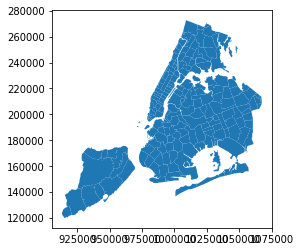

In [156]:
urlretrieve('https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip','zipcode.zip')
os.system('unzip zipcode.zip')
shape=gpd.GeoDataFrame.from_file('ZIP_CODE_040114.shp')
shape.plot()

Convert the ZIPCODE columns from object into int in order to merge with census bureau business data

In [157]:
shape.ZIPCODE=shape.ZIPCODE.astype(str).astype(int)

### Merge file together

In [158]:
mydata=shape.merge(basedf,left_on='ZIPCODE',right_on="ZIP",how='inner')
mydata.shape

(260, 35)

### Drop useless columns

In [159]:
col=mydata.columns.tolist()
mydata.drop(columns=[col[13]],inplace=True)
mydata.drop(columns=[i for i in col[1:12]],inplace=True)
mydata.drop(columns=['geometry'],inplace=True)

In [160]:
mydata.set_index('ZIPCODE',inplace=True)

In [161]:
data=((mydata.T-mydata.mean(1))/mydata.std(1)).T

In [162]:
data=data.fillna(value=0)

In [163]:
data.head()

EST94     EST95     EST96     EST97     EST98     EST99     EST00  \
ZIPCODE                                                                         
11436   -1.296083 -1.347340 -1.193568 -1.296083 -1.296083 -0.937280 -0.578478   
11213   -1.433782 -1.305462 -1.186307 -0.975496 -0.792181 -0.819678 -0.783015   
11212   -1.077974 -1.210216 -1.114040 -0.813490 -0.909666 -0.645182 -0.897644   
11225   -1.223282 -1.159696 -1.149098 -0.915948 -0.852361 -0.926545 -0.841764   
11218   -1.474935 -1.336988 -1.180649 -1.061095 -0.863371 -0.720826 -0.665648   

            EST01     EST02     EST03    ...        EST05     EST06     EST07  \
ZIPCODE                                  ...                                    
11436   -0.988538  0.087870 -0.117160    ...     0.292900  0.190385  0.395415   
11213   -0.636364 -0.150580  0.060232    ...    -0.058923  0.023569 -0.058923   
11212   -0.813490 -0.212389 -0.164301    ...    -0.092169 -0.296543 -0.092169   
11225   -0.788775 -0.184704 -0.089324    ...    -0.057531  0.027251  0.186217   
11218   -0.578281 -0.357567 -0.270200    ...     0.120649  0.116050  0.327569   

            EST08     EST09     EST10     EST11     EST12     EST13     EST14  
ZIPCODE                                                                        
11436    0.702960  0.805475  1.113020  1.266793  0.959248  1.164278  1.676853  
11213    0.271044  0.536850  1.031799  1.022634  1.499252  1.765058  1.920875  
11212    0.088161  0.629152  1.254297  1.422605  1.518781  1.639001  1.891464  
11225    0.249804  0.493552  0.885668  1.065830  1.341371  1.871258  2.115007  
11218    0.419533  0.695427  0.773596  0.998909  1.375964  1.753018  1.978331  

[5 rows x 21 columns]

# Data cleaning


you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## TASKS:
    
1. get and prep your data.
2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
in **a few** clusters (as discussed there is no real good, sound way to 
decide what a good number is here. try a few options, keeping in mind 
a few is more than a couple, but i recommand you stay within the 
single digit numbers)

3. plot the cluster centers (if you used K means those are the means of 
the clusters). you can plot for example the cluster centers overlayed on 
each time series (using the alpha channel to control the opacity in the 
plot may be helpful here).

4. Use another clustering algorithm (of your choice)

5. overlay your data on a NYC map: you can use shapefiles for the 
zip codes and different colors for different clusters

6. Compare the results of the 2 algorithms

7. attempt an interpretation. this is dangerous ground: clustering is 
an exploratory tool so you do not want to jump to conclusions because 
you see some clusters! but seeing structure in your data can inform 
your next moves as an investigator. 


Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (260,)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape

## K-means Clustering

In [255]:
def plot_k_mean(nc,data):
    nc = nc
    km = KMeans(n_clusters=nc, random_state=444).fit(data)
    height=15+(nc-2)*2
    fig = plt.figure(figsize = (12,height))
    label=pd.DataFrame(km.labels_)
    for i in range(nc):
        ax = fig.add_subplot(nc,1,i+1)
        km_ind=label[km.labels_==i]
        plt.plot(year,data.iloc[km_ind.index.tolist()].values.reshape(21,len(km_ind)),'k',alpha=0.4)
        plt.plot(year,km.cluster_centers_[i].reshape(21,),color='r',linewidth=13,alpha=0.8)
        plt.xlabel('year')
        plt.ylabel('EST')
    plt.title('Time series lines and mean centroid lines in clusters num%s using Kmeans'%i)
    x=print('number of cluster=%s'%nc)
    return km.labels_


### Plotting the time series in each cluster

number of cluster=3


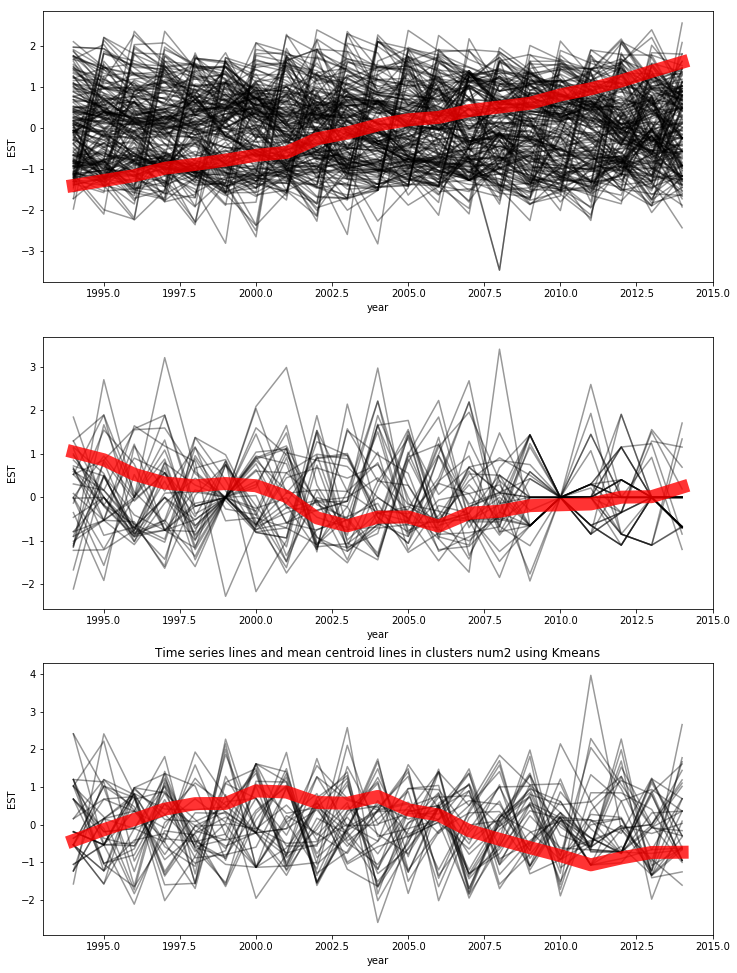

In [256]:
label3=plot_k_mean(3,data)

### Caption:
From the centroid time series, we could see there is a upward trend for the first cluster while the other two clusters do not show a monotonic incresing and decresing trend. The second cluster seems to decline until 2004 and then slightly increases. The third cluster is the opposite, increase first and then decline.

number of cluster=5


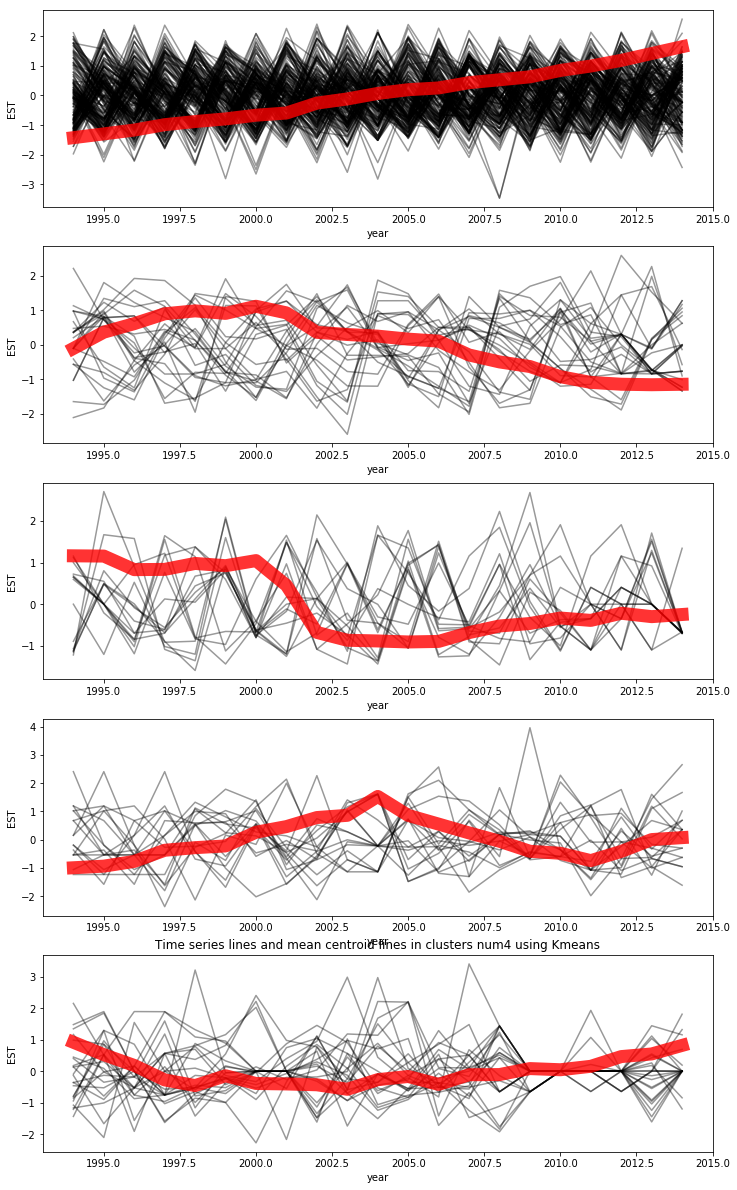

In [257]:
label5=plot_k_mean(5,data)

### Caption:
It cluster the data in 5 different group with different trends. 

number of cluster=7


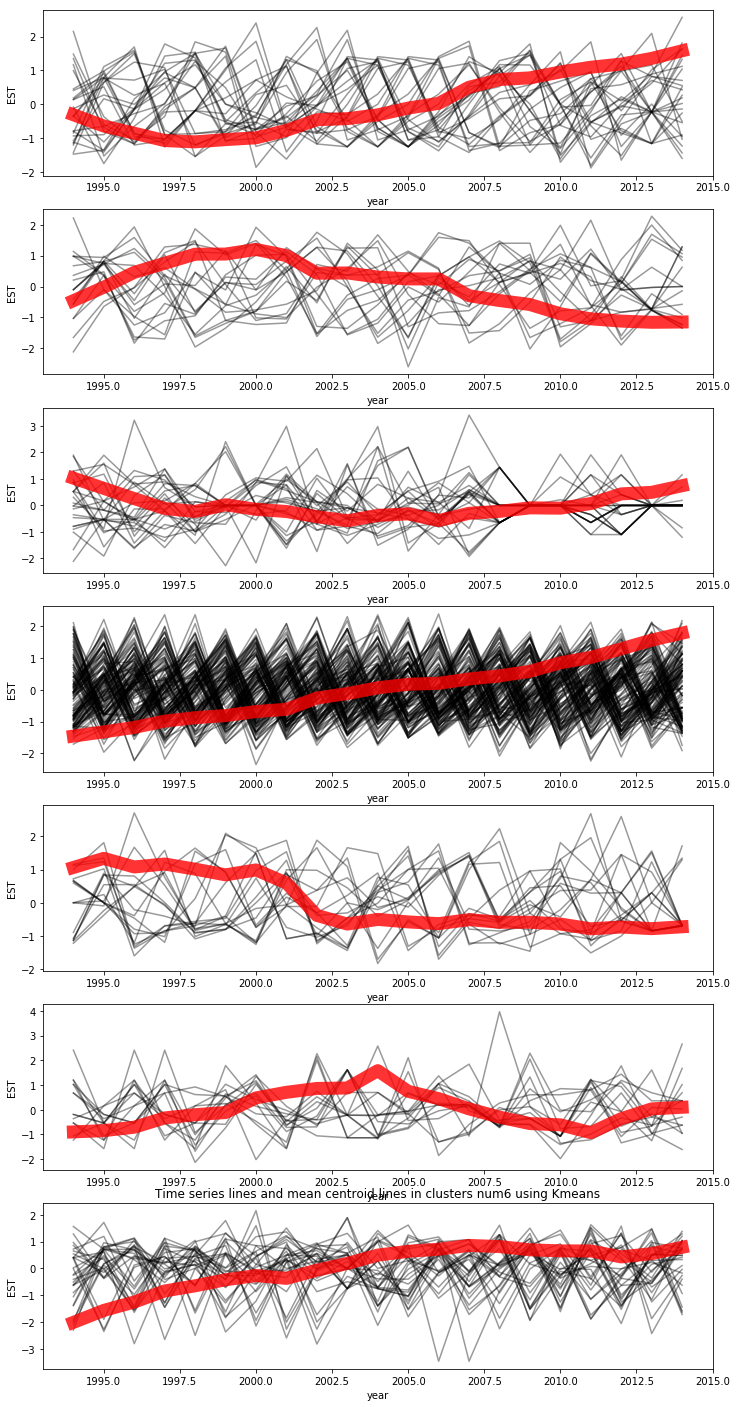

In [258]:
label7=plot_k_mean(7,data)

### Caption:
It cluster the data in 7 different group with different trends. 

In [262]:
def plot_maps_kmeans(shape,data,label):
    km_label=label
    urlretrieve('https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip','zipcode.zip')
    os.system('unzip zipcode.zip')
    shape=gpd.GeoDataFrame.from_file('ZIP_CODE_040114.shp')
    shape.ZIPCODE=shape.ZIPCODE.astype(str).astype(int)
    shape.set_index('ZIPCODE',inplace=True)
    maps=shape.merge(data,on='ZIPCODE',how='inner')
    col=maps.columns.tolist()
    maps.drop(columns=[i for i in col[0:11]],inplace=True)
    maps.reset_index(inplace=True)
    maps['cluster']=pd.DataFrame(km_label)
    maps.dropna(inplace=True)
    ax=maps.plot(column='cluster',cmap='Purples',edgecolor="black",lw=0.5,figsize=(10,10),categorical=True,legend=True)
    ax.axis('off')
    ax.set_title('Plotting Kmeans clustering result on NYC map')
    x=print('Plot the cluster on the map')
    return x

Plot the cluster on the map


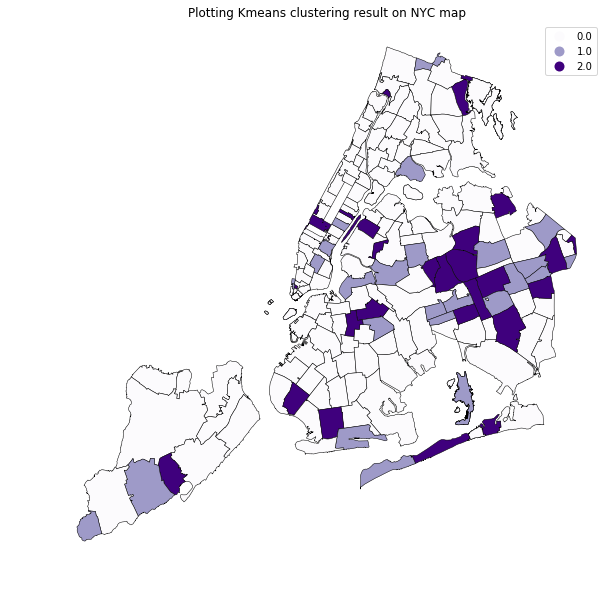

In [263]:
plot_maps_kmeans(shape,data,label3)

### Caption:
The map is divided into three cluster part. Each cluster represent the zip area in that clusters are similar in time seres data

Plot the cluster on the map


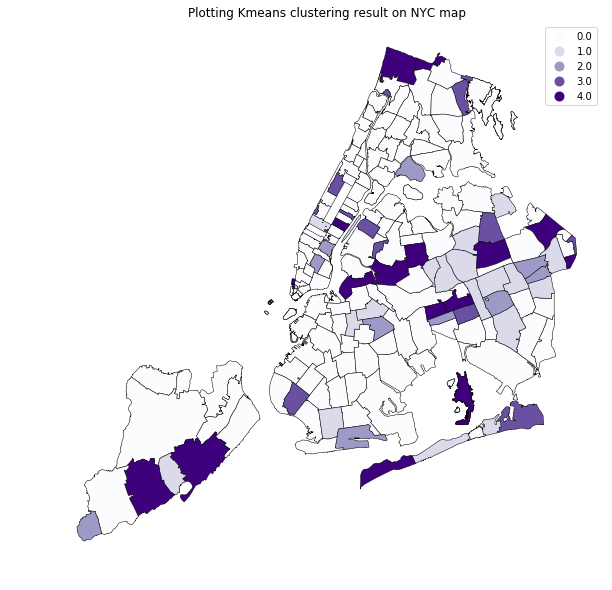

In [264]:
plot_maps_kmeans(shape,data,label5)

### Caption:
The map is divided into five cluster part. Each cluster represent the zip area in that clusters are similar in time seres data

Plot the cluster on the map


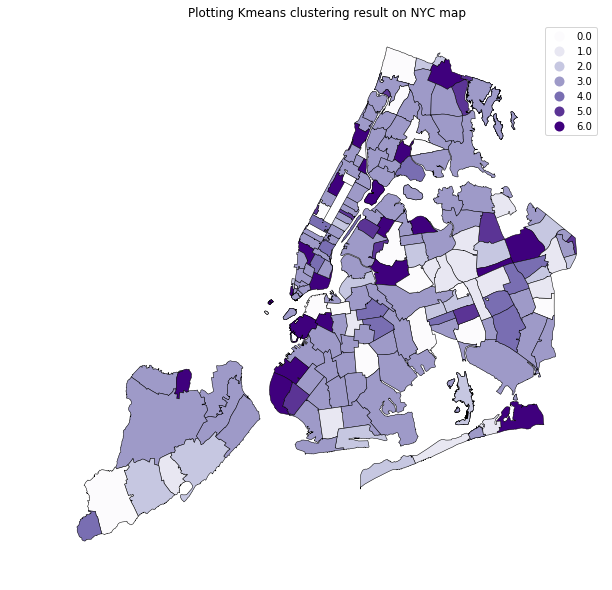

In [265]:
plot_maps_kmeans(shape,data,label7)

### Caption:
The map is divided into seven cluster part. Each cluster represent the zip area in that clusters are similar in time seres data

# If you want to use agglomerative clustering

In [276]:
def agc_cluster(data,num_of_cluster):
    nc=num_of_cluster
    agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit(data)
    labelsag = agc.labels_
    height=15+(nc-2)*2
    fig = plt.figure(figsize = (12,height))
    label=pd.DataFrame(agc.labels_)
    for i in range(nc):
        ax = fig.add_subplot(nc,1,i+1)
        agc_ind=label[agc.labels_==i]
        plt.plot(year,data.iloc[agc_ind.index.tolist()].values.reshape(21,len(agc_ind)),'k',alpha=0.4)

        plt.plot(year,data.iloc[agc_ind.index.tolist()].mean(axis=0),color='r',linewidth=13,alpha=0.8)
        plt.xlabel('year')
        plt.ylabel('EST')
        plt.title('Time series lines and mean centroid lines in clusters num%s using agglomerative clustering'%i)
    print('Number of cluster is %s'%nc)
    return agc.labels_

Number of cluster is 3


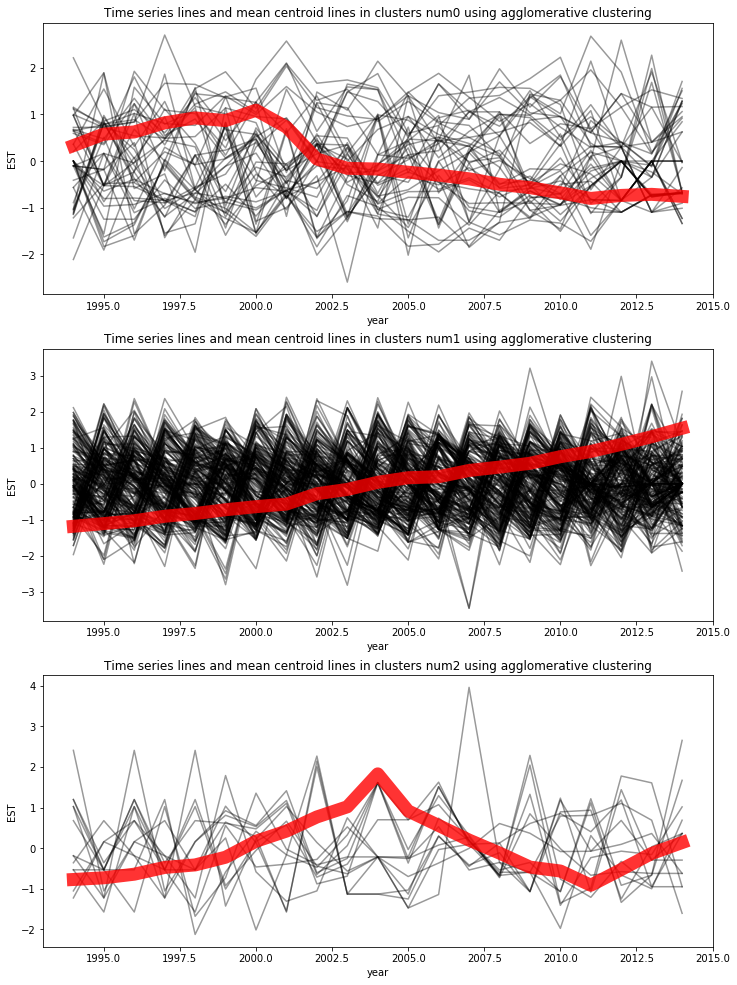

In [277]:
agc_label3=agc_cluster(data,3)

### Caption:
It clusters the data in 3 different group with different trends. The cluster result is different from the 3 cluster by Kmean clustering

Number of cluster is 5


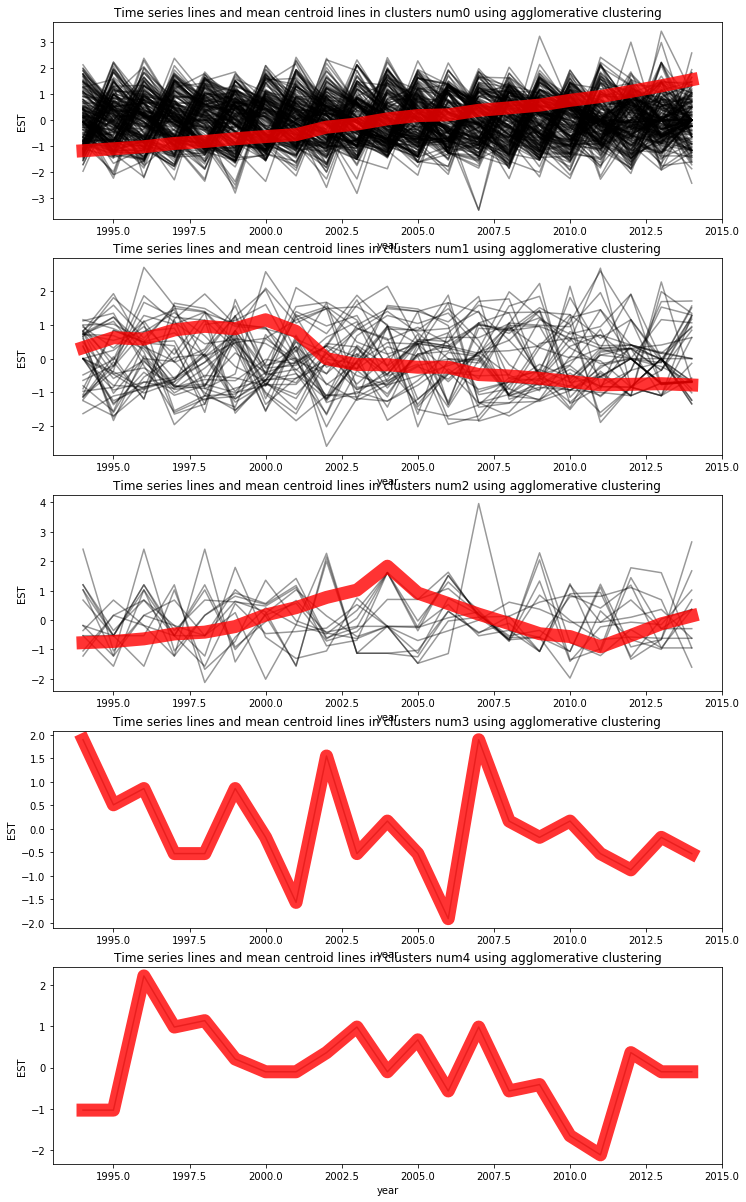

In [278]:
agc_label5=agc_cluster(data,5)

### Caption:
It clusters the data in 5 different group with different trends. Two cluster only have one group member, which suggests that the cluster number may be too large

Number of cluster is 7


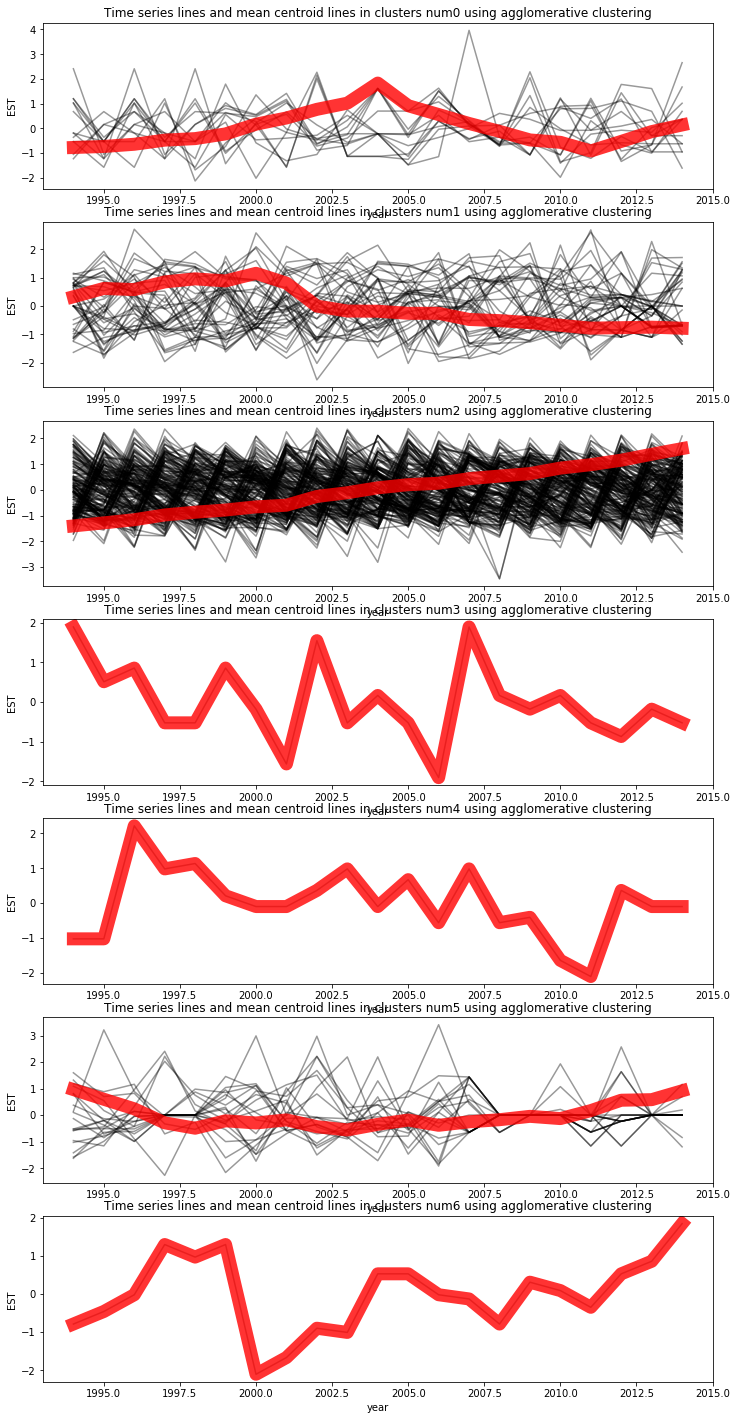

In [279]:
agc_label7=agc_cluster(data,7)

### Caption:
It clusters the data in 7 different group with different trends. Three cluster only have one group member. Which may indicates that the cluster number is too large

In [280]:
def plot_maps_agc(shape,data,label):
    agc_label=label
    urlretrieve('https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip','zipcode.zip')
    os.system('unzip zipcode.zip')
    shape=gpd.GeoDataFrame.from_file('ZIP_CODE_040114.shp')
    shape.ZIPCODE=shape.ZIPCODE.astype(str).astype(int)
    shape.set_index('ZIPCODE',inplace=True)
    maps=shape.merge(data,on='ZIPCODE',how='inner')
    col=maps.columns.tolist()
    maps.drop(columns=[i for i in col[0:11]],inplace=True)
    maps.reset_index(inplace=True)
    maps['cluster']=pd.DataFrame(agc_label)
    maps.dropna(inplace=True)
    ax=maps.plot(column='cluster',cmap='Purples',edgecolor="black",lw=0.5,figsize=(10,10),categorical=True,legend=True)
    ax.axis('off')
    ax.set_title('Plotting Agglomerative clustering result on NYC map')
    x=print('Plot the cluster on the map')
    return x

Plot the cluster on the map


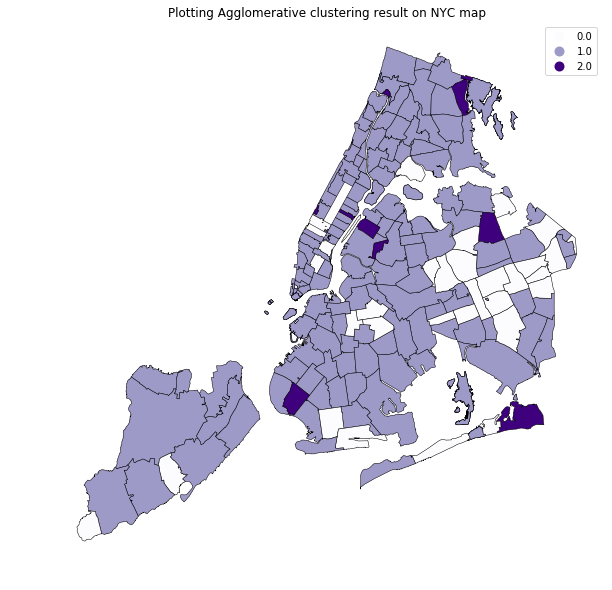

In [281]:
plot_maps_agc(shape,data,agc_label3)

Plot the cluster on the map


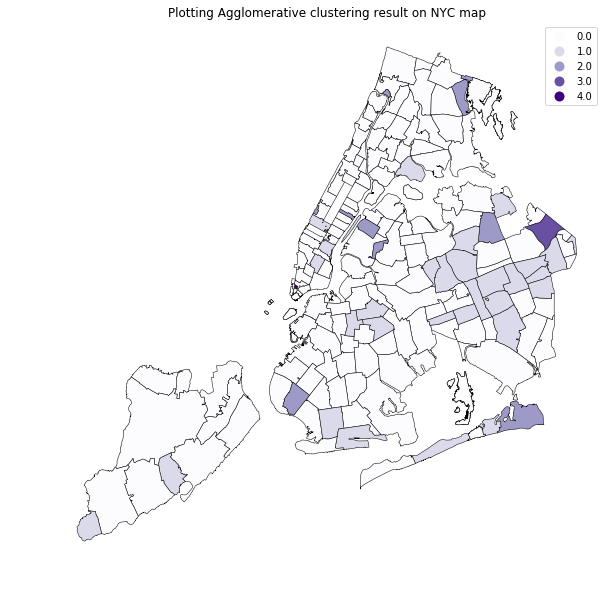

In [282]:
plot_maps_agc(shape,data,agc_label5)

Plot the cluster on the map


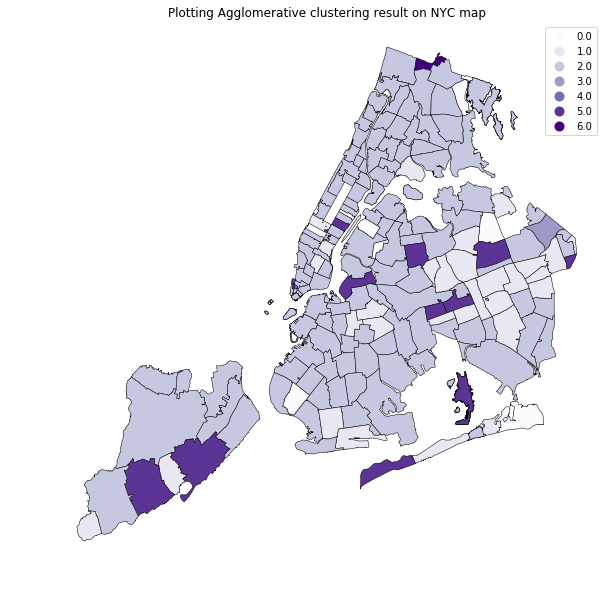

In [283]:
plot_maps_agc(shape,data,agc_label7)

## Comparison

Plot the cluster on the map
Plot the cluster on the map


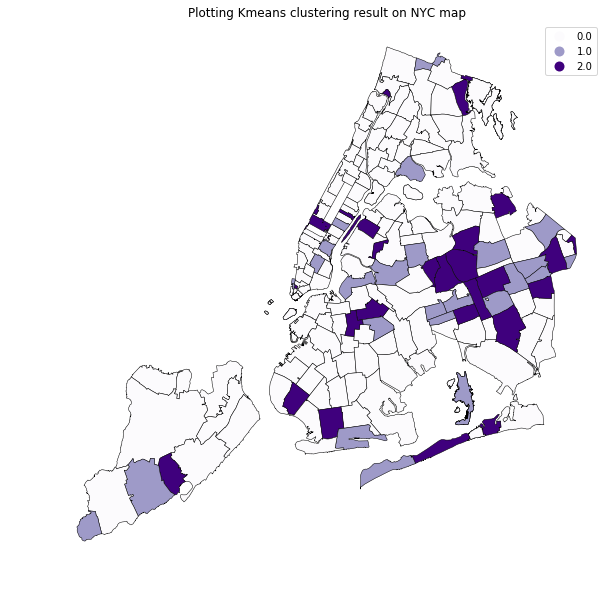

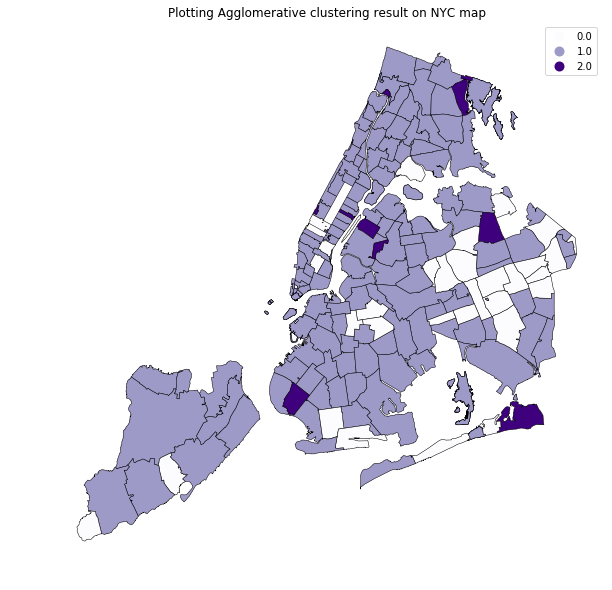

In [287]:
plot_maps_kmeans(shape,data,label3);
plot_maps_agc(shape,data,agc_label3)

## Caption:
The two maps are very similar in turns of the position it cluster

Plot the cluster on the map
Plot the cluster on the map


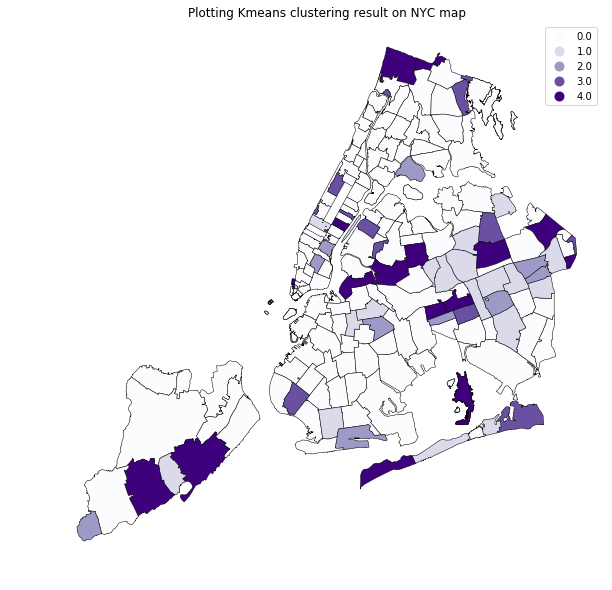

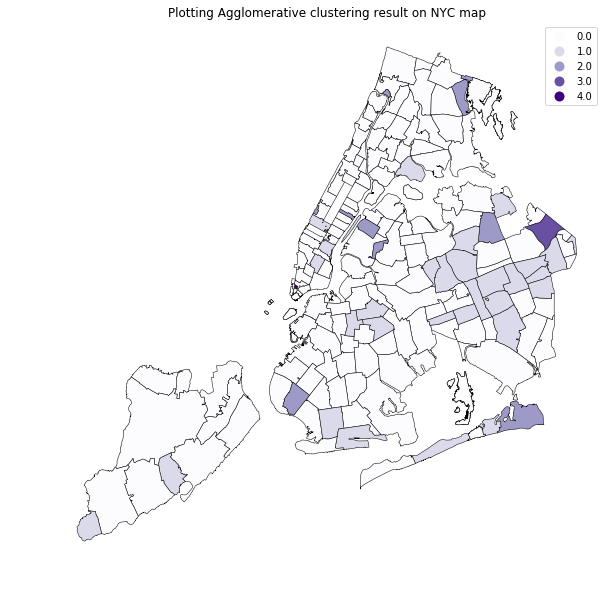

In [288]:
plot_maps_kmeans(shape,data,label5);
plot_maps_agc(shape,data,agc_label5)

## Caption:
The two maps are still somehow similar in turns of the position it cluster. But there are some position they are different

Plot the cluster on the map
Plot the cluster on the map


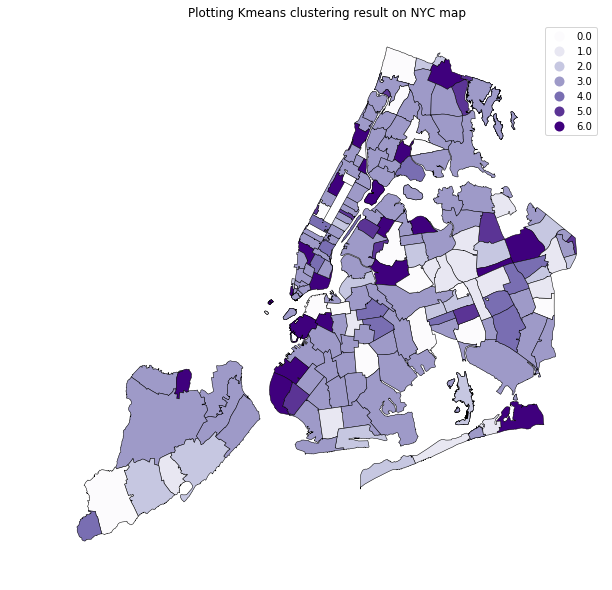

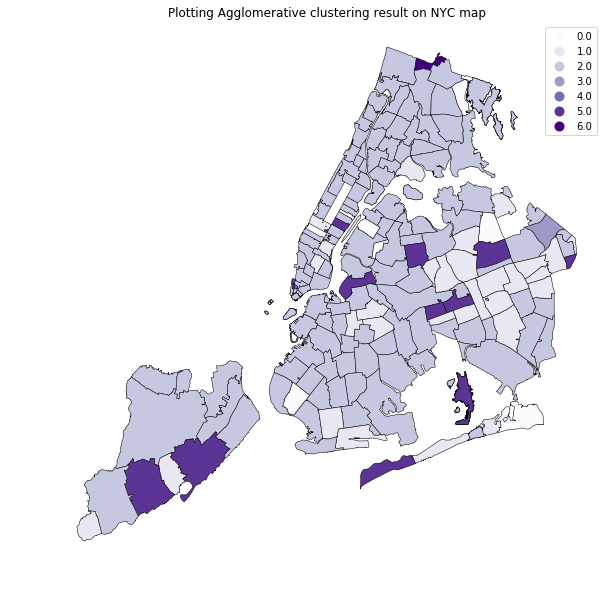

In [289]:
plot_maps_kmeans(shape,data,label7);
plot_maps_agc(shape,data,agc_label7)

## Caption:
The different of clustering bewteen these two maps becomes larger

### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

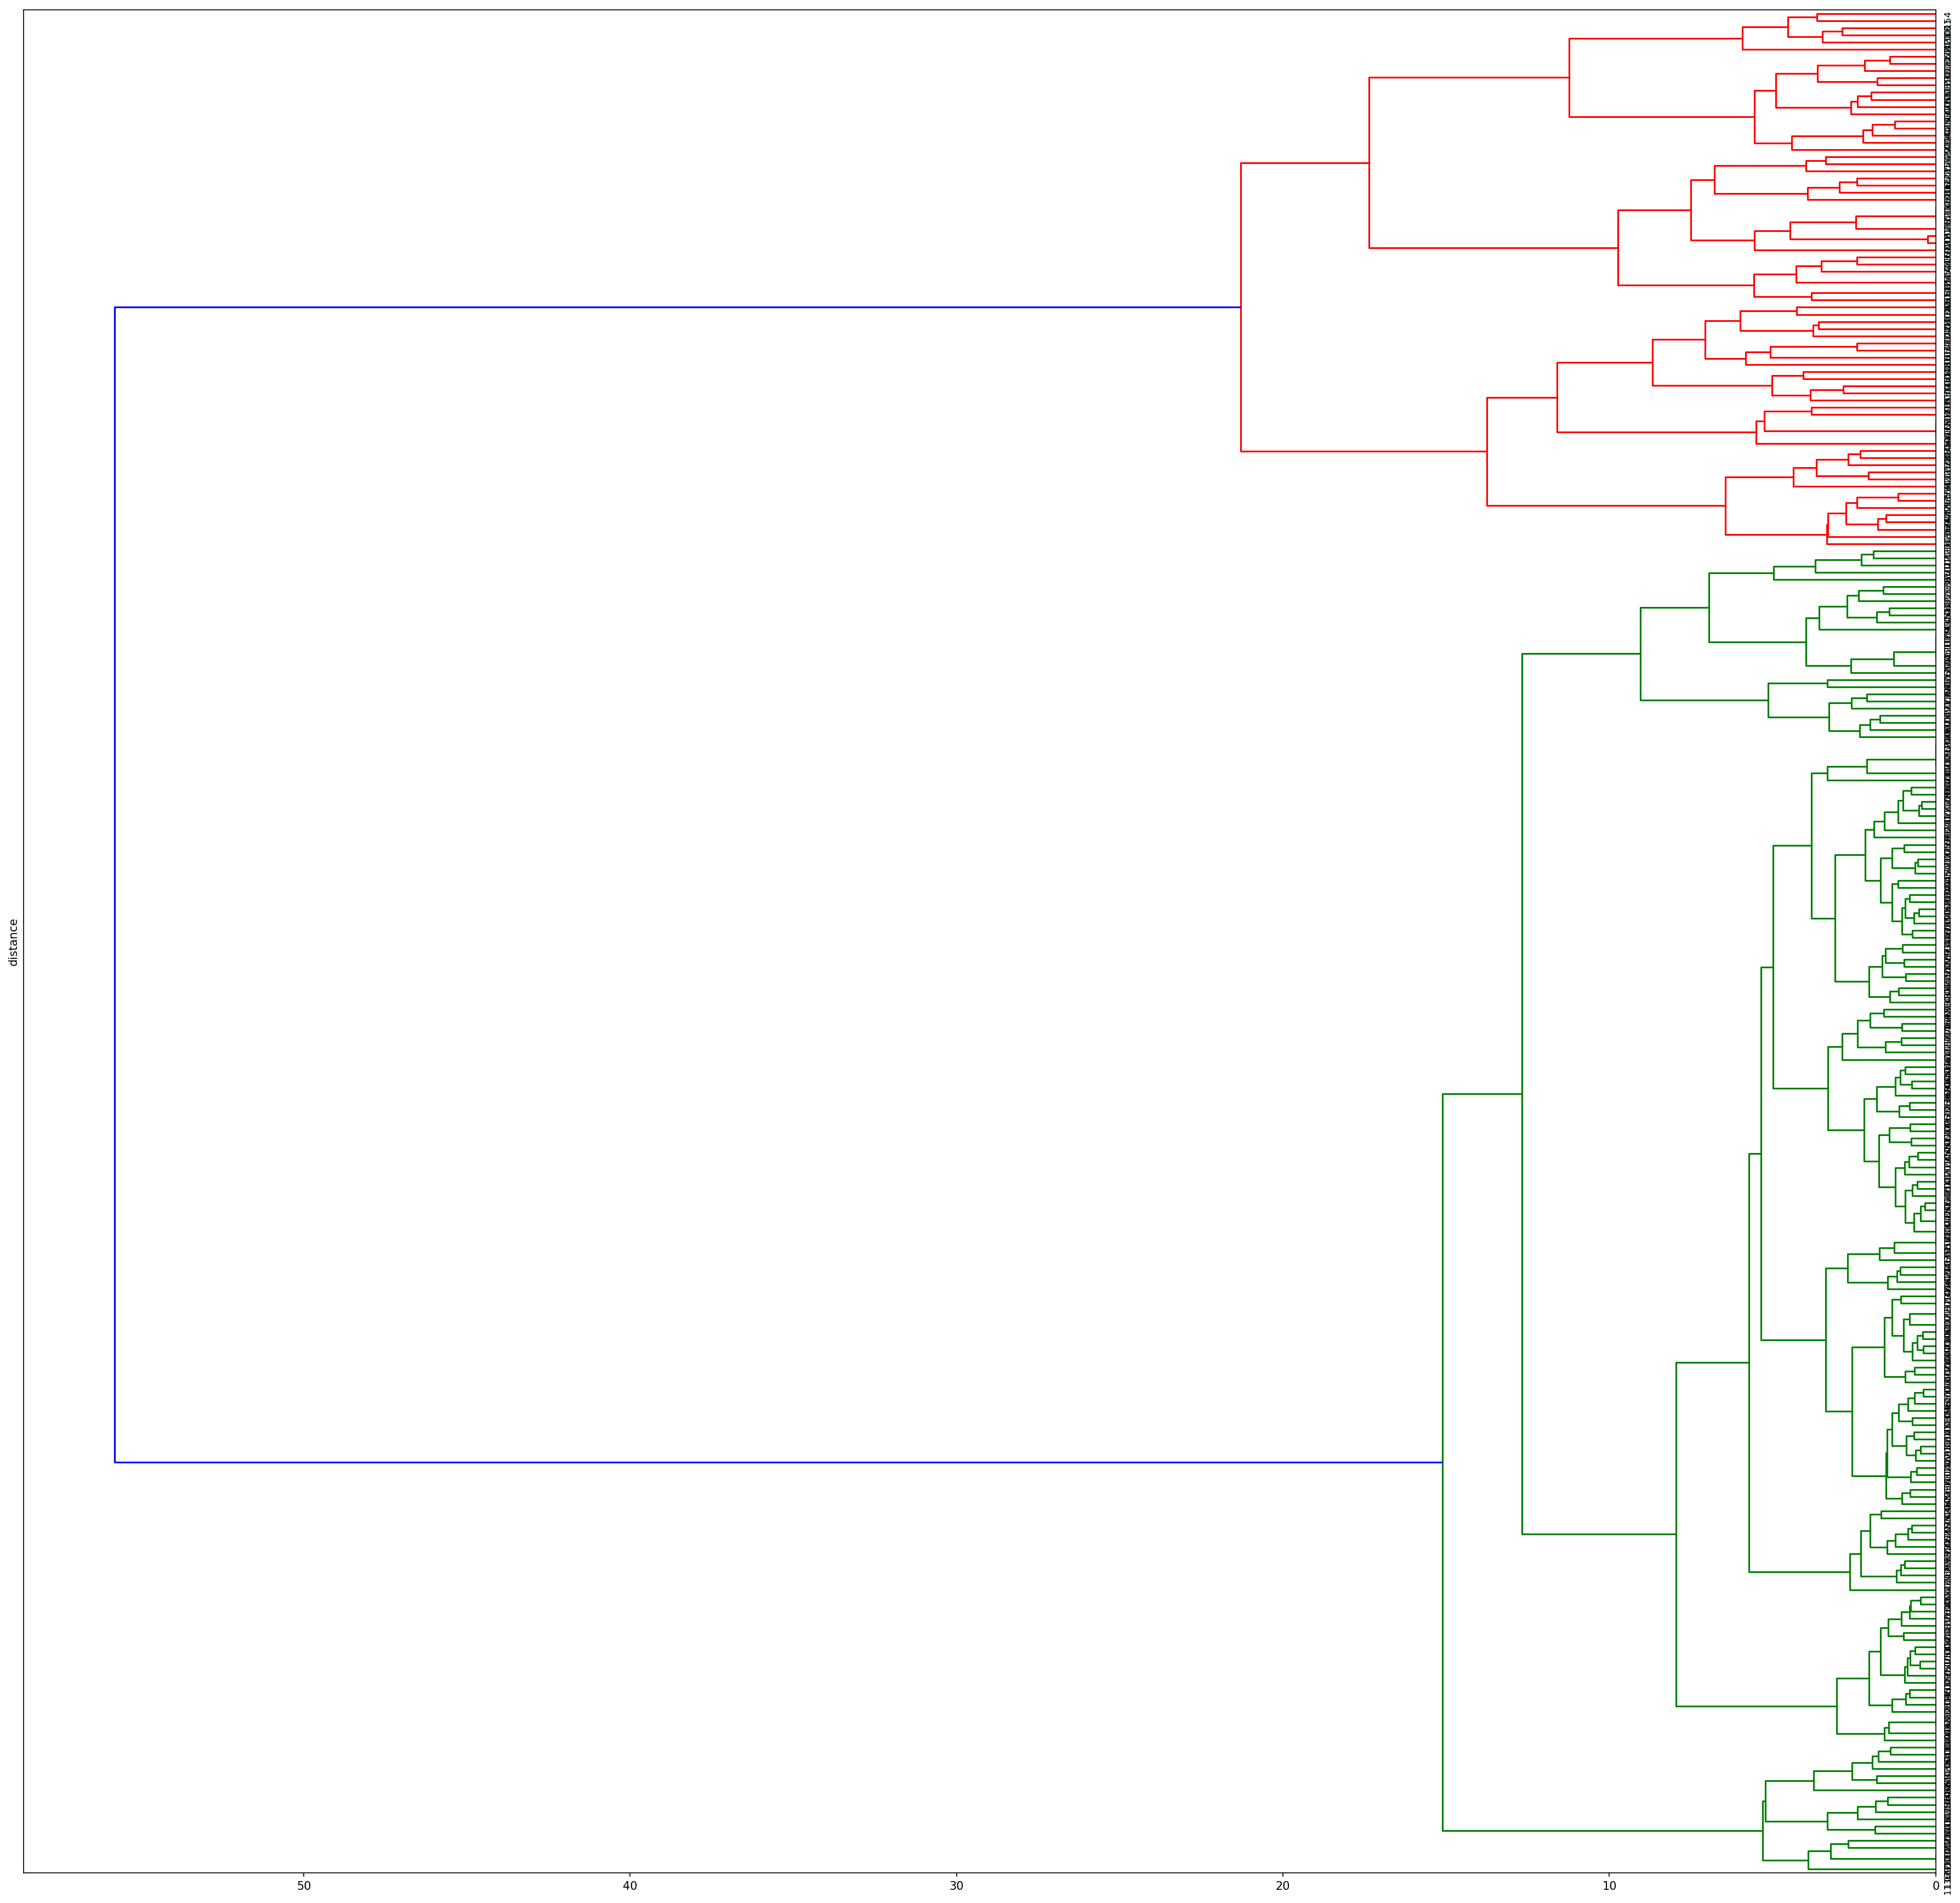

In [226]:
import scipy.cluster as scp
fig = pl.figure(figsize=(30,30), dpi=150)
zipcodes = list(maps['ZIPCODE'])
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(data, method='ward'),
                               labels = zipcodes,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.,orientation='left'
                              )  # font size for the x axis labels)

In [20]:
!pwd

/nfshome/fb55/PUI2017_fb55/HW11_fb55
